### Fish Modelling

In [27]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

import matplotlib.pyplot as plt
import numpy as np

def norm(mu, sigma, size):
    s = np.random.normal(mu, sigma,size)
    return s


In [28]:
table=pd.read_csv('data/FishDataRefined.csv')
year=table.Year
pollution=table.Pollution
sharks=table.Sharks
print(table)

    Year     Plastic    Pollution  Sharks
0   1970   249000000    8560.4706    1.59
1   1971   287000000    9866.8878    1.63
2   1972   331000000   11379.5814    1.74
3   1973   382000000   13132.9308    1.41
4   1974   434000000   14920.6596    1.56
5   1975   480000000   16502.1120    1.57
6   1976   534000000   18358.5996    1.78
7   1977   593000000   20386.9842    2.35
8   1978   657000000   22587.2658    1.41
9   1979   728000000   25028.2032    1.17
10  1980   798000000   27434.7612    1.32
11  1981   870000000   29910.0780    1.62
12  1982   943000000   32419.7742    1.14
13  1983  1023000000   35170.1262    1.01
14  1984  1109000000   38126.7546    0.99
15  1985  1199000000   41220.9006    1.29
16  1986  1295000000   44521.3230    1.27
17  1987  1399000000   48096.7806    0.99
18  1988  1509000000   51878.5146    1.16
19  1989  1623000000   55797.7662    1.01
20  1990  1743000000   59923.2942    0.93
21  1991  1867000000   64186.3398    1.03
22  1992  1999000000   68724.4206 

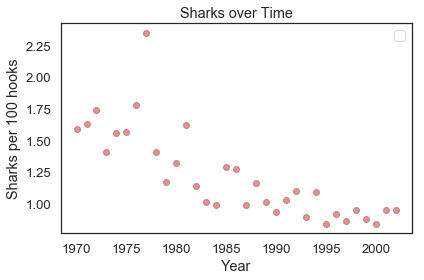

In [29]:
plot(year,sharks,"ro")

decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Sharks over Time')


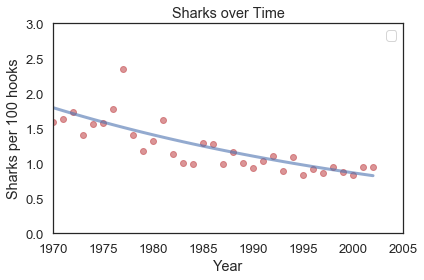

In [30]:
#sharkModelInv=10/(year-1970)+.5
sharkModelExp=1.795*exp(-0.02435*((year-1970)))
plot(year,sharks,"ro")
#plot(year,sharkModelInv)
plot(year,sharkModelExp)
decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Sharks over Time',xlim=[1970,2005],ylim=[0,3])

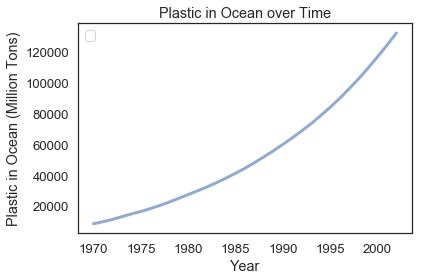

In [31]:
plot (year,pollution)
decorate(xlabel='Year', 
             ylabel='Plastic in Ocean (Million Tons)',
             title='Plastic in Ocean over Time')

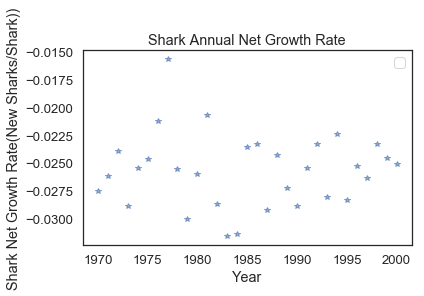

In [32]:
sharkRateReg2=-29747643494751453184 *exp(-0.02435 *table.Year)   #The derivative of the regression equation for sharks
plot(year[0:31],(sharkRateReg2/sharks)[0:31],'*' ) #Find the rate of shark reproduction per shark, aka growth rate
decorate(xlabel='Year', 
             ylabel='Shark Net Growth Rate(New Sharks/Shark))',
             title='Shark Annual Net Growth Rate')
# From Matlab

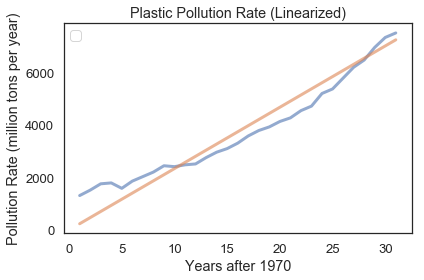

In [33]:
def rate_finder(data):
    rate=[]
    for i in linrange(1, 32, 1):
        rate.append(data[i]-data[i-1])
    return rate
pollutionRate=rate_finder(pollution)


plot(linrange(1, 32, 1),pollutionRate)     #Plot pollution rate and find a fit function for it
pollutionRateLin=(7000/30)*(linrange(1, 32, 1))
plot(linrange(1, 32, 1),pollutionRateLin)
sharkRateLin=1.795*exp(-0.02435*((linrange(1, 32, 1)-1970)))

decorate(xlabel='Years after 1970', 
             ylabel='Pollution Rate (million tons per year)',
             title='Plastic Pollution Rate (Linearized)')

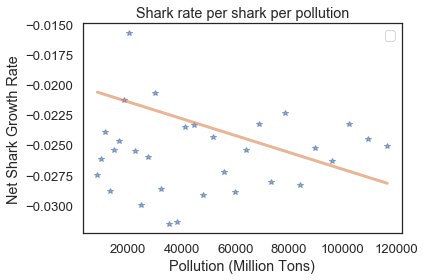

In [34]:
plot(pollution[0:31],(sharkRateReg2/sharks)[0:31],'*' )

plot(pollution[0:31],-.00000007*pollution[0:31]-.02)  #This is the final equation relating pollution to shark rates that can be put into the probability function.
decorate(xlabel='Pollution (Million Tons)', 
             ylabel='Net Shark Growth Rate',
             title='Shark rate per shark per pollution')


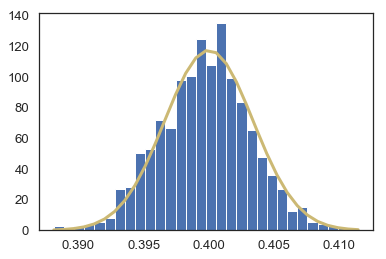

In [38]:
s = norm(0.4, 0.0034,1000)
#print(s)

count, bins, ignored = plt.hist(s, 30, density=True)
def plot_norm(mu, sigma):
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
    plt.show()

plot_norm(0.4, 0.0034)


In [63]:
s = norm(0.4, 0.1,1)
print(s)


[0.25036929]


In [64]:

def Simulation():
    pollutionRate=TimeSeries()
    pollution=TimeSeries()
    SharkRate=TimeSeries()
    sharks=TimeSeries()
    pollutionRate[1971]=700/3
    sharks[1971]=1.63
    
    for i in linrange(1972,2002):
        pollutionRate=700/3*(i-1970)
        pollution[i+1] = pollution[i]*pollutionRate
        SharkRate[i+1]= norm(-.00000007*pollution[i]-.02, .0034,1)
        sharks[i+1]= sharks[i]+sharks[i]*SharkRate
        return sharks

Simulation()

IndexError: index out of bounds